## Importing the libraries

In [207]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [208]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [209]:
#checking the shpae of the dataset
df.shape

(614, 13)

In [210]:
#checking the columns of the dataset
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [211]:
#checking the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [212]:
#checking the null values in the dataset
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [213]:
df.drop('Loan_ID',axis=1,inplace=True)

we are removing Loan_ID column as it is not giving any helpful information in predicting accuracy of the model

In [214]:
#checking he unique elements in the every columns
df.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [215]:
#Statistical information of the dataset
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [216]:
#getting the categorical column from the dataset
df.dtypes[df.dtypes=='object']

Gender           object
Married          object
Dependents       object
Education        object
Self_Employed    object
Property_Area    object
Loan_Status      object
dtype: object

In [217]:
# Indentifying the continuous from the dataset
df.dtypes[df.dtypes!='object']

ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
dtype: object

In [218]:
df.Gender.unique()

array(['Male', 'Female', nan], dtype=object)

In [219]:
df.Married.unique()

array(['No', 'Yes', nan], dtype=object)

In [220]:
df.Dependents.unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [221]:
df.Self_Employed.unique()

array(['No', 'Yes', nan], dtype=object)

In [222]:
df.LoanAmount.unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [223]:
df.Loan_Amount_Term.unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [224]:
df.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [225]:
from sklearn.impute import SimpleImputer

In [226]:
s=SimpleImputer(missing_values=np.nan,strategy='most_frequent',verbose=0)

In [227]:
miss_val=['Gender','Married','Dependents','Self_Employed','Credit_History']

In [228]:
df[miss_val]=s.fit_transform(df[miss_val])

In [229]:
df.isna().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [230]:
from sklearn.impute import KNNImputer

In [231]:
k=KNNImputer(n_neighbors=2)

In [232]:
miss_val=['Loan_Amount_Term','LoanAmount']

In [233]:
df[miss_val]=k.fit_transform(df[miss_val])

In [234]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Data Analysis

Y    422
N    192
Name: Loan_Status, dtype: int64


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

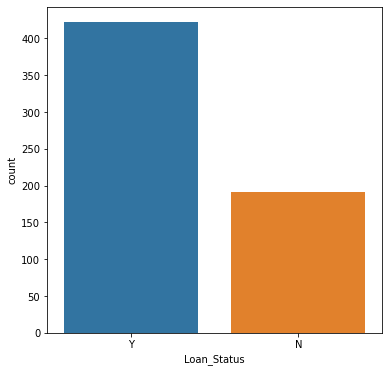

In [235]:
print(df['Loan_Status'].value_counts())
plt.figure(figsize=(6,6))
sns.countplot(x='Loan_Status', data=df)

Yes    401
No     213
Name: Married, dtype: int64


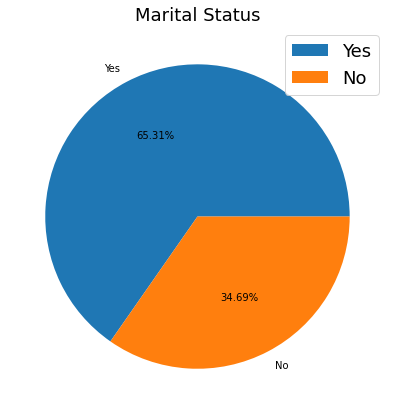

In [236]:
print(df['Married'].value_counts())
plt.figure(figsize=(7,7))
plt.pie(df['Married'].value_counts(), labels=df['Married'].value_counts().index, autopct='%1.2f%%')
plt.title('Marital Status',fontsize=18)
plt.legend(prop={'size':18})
plt.show()

Male      502
Female    112
Name: Gender, dtype: int64


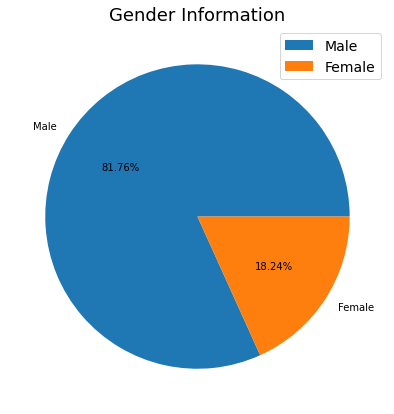

In [237]:
print(df['Gender'].value_counts())
plt.figure(figsize=(7,7))
plt.pie(df['Gender'].value_counts(), labels=df['Gender'].value_counts().index, autopct='%1.2f%%')
plt.title('Gender Information',fontsize=18)
plt.legend(prop={'size':14})
plt.show()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


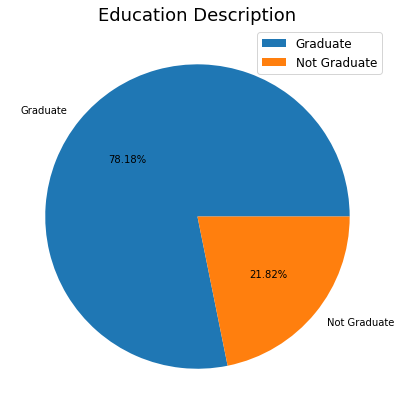

In [238]:
print(df['Education'].value_counts())
plt.figure(figsize=(7,7))
plt.pie(df['Education'].value_counts(),labels=df['Education'].value_counts().index, autopct='%1.2f%%')
plt.title('Education Description', fontsize=18)
plt.legend(prop={'size':12})
plt.show()

No     532
Yes     82
Name: Self_Employed, dtype: int64


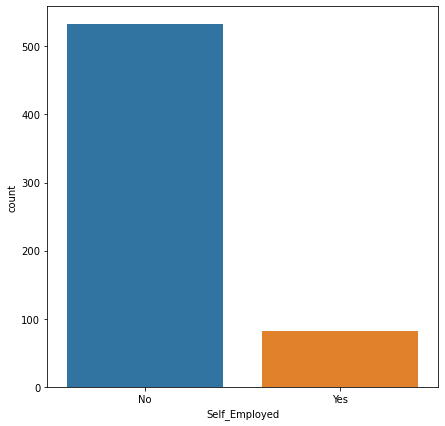

In [239]:
print(df['Self_Employed'].value_counts())
plt.figure(figsize=(7,7))
sns.countplot(x='Self_Employed',data=df)
plt.show()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


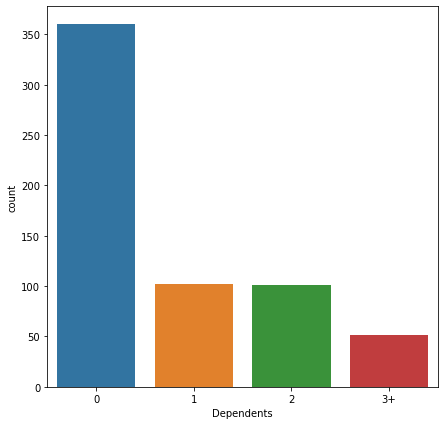

In [240]:
print(df['Dependents'].value_counts())
plt.figure(figsize=(7,7))
sns.countplot(x='Dependents',data=df)
plt.show()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


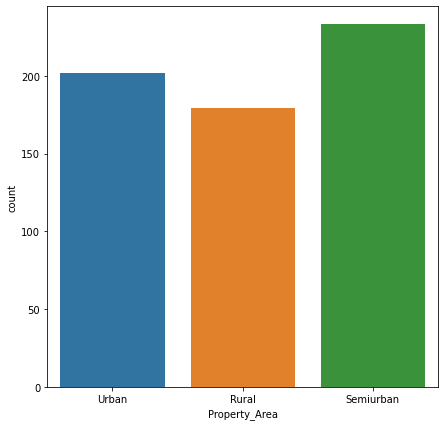

In [241]:
print(df['Property_Area'].value_counts())
plt.figure(figsize=(7,7))
sns.countplot(x='Property_Area',data=df)
plt.show()

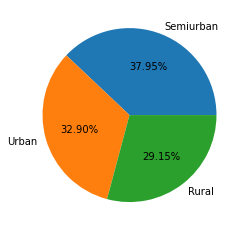

In [242]:
labels='Semiurban','Urban','Rural'
fig,ax=plt.subplots()
ax.pie(df['Property_Area'].value_counts(),labels=labels,radius =1,autopct ='%1.2f%%')
plt.show()

1.0    525
0.0     89
Name: Credit_History, dtype: int64


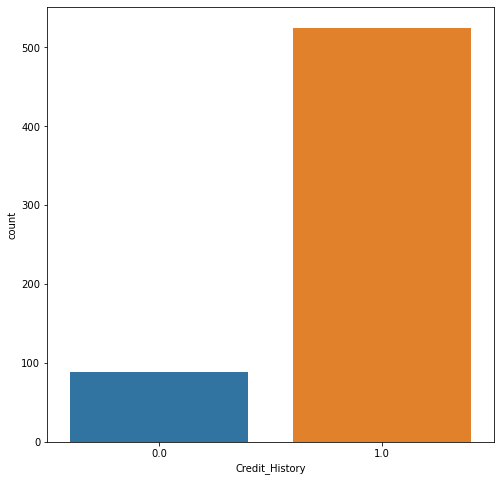

In [243]:
print(df['Credit_History'].value_counts())
plt.figure(figsize=(8,8))
sns.countplot(x='Credit_History',data=df)
plt.show()

## Analysis of continuous data column

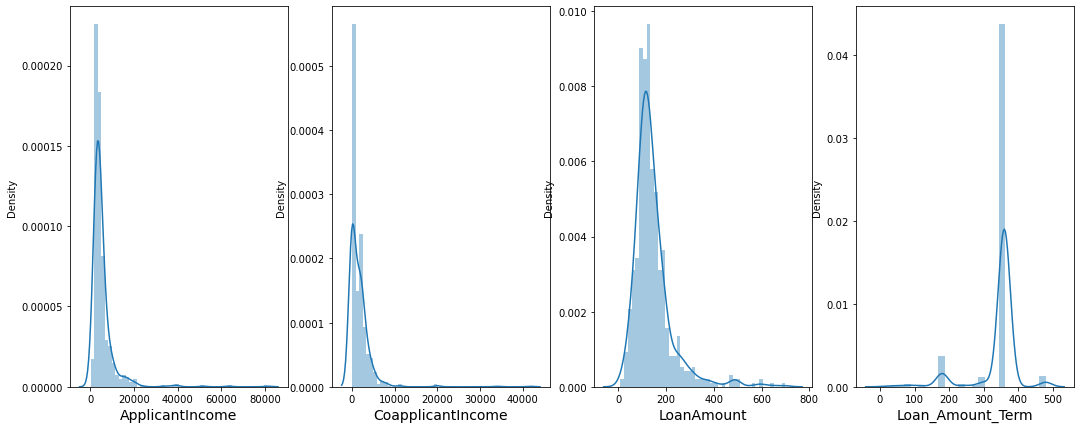

In [244]:
plt.figure(figsize=(18,7))
plot_num=1
for i in df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]:
    if plot_num<=5:
        plt.subplot(1,4,plot_num)
        sns.distplot(df[i])
        plt.xlabel(i,fontsize=14)
    plot_num+=1
plt.show()

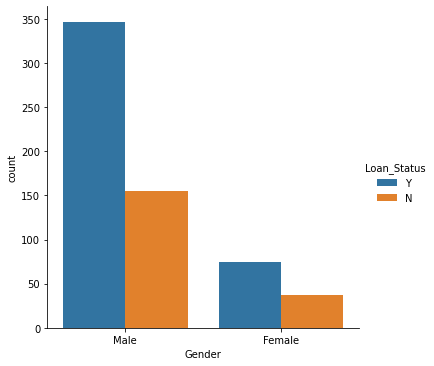

In [245]:
#Factor plot for Gender
sns.factorplot('Gender',kind='count',data=df,hue='Loan_Status')
plt.xticks(rotation=0);

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

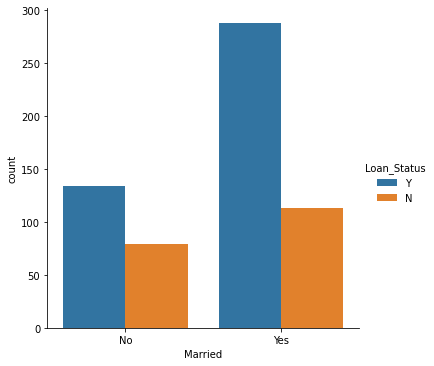

In [246]:
sns.factorplot('Married',kind='count',data=df, hue='Loan_Status')
plt.xticks(rotation=0)

Married people get more loan approval

(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3+')])

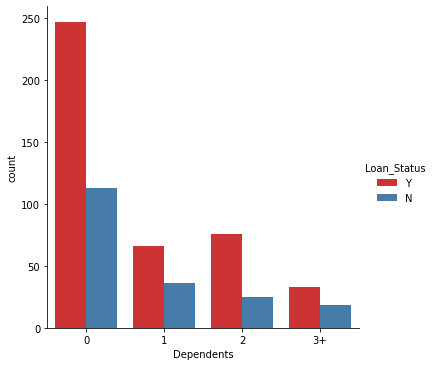

In [247]:
sns.factorplot('Dependents',kind='count',data=df, hue='Loan_Status',palette='Set1')
plt.xticks(rotation=0)

dependent with 0 have higher loan approvals

(array([0, 1]), [Text(0, 0, 'Graduate'), Text(1, 0, 'Not Graduate')])

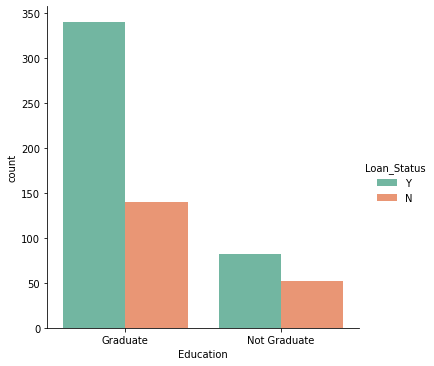

In [248]:
sns.factorplot('Education',kind='count',data=df, hue='Loan_Status',palette='Set2')
plt.xticks(rotation=0)

Graduate get high number of loan approval 

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

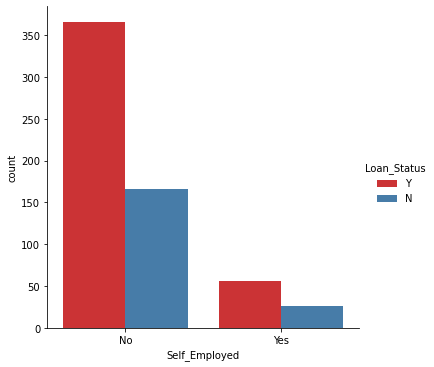

In [249]:
sns.factorplot('Self_Employed',kind='count',data=df, hue='Loan_Status',palette='Set1')
plt.xticks(rotation=0)

## Bivarant Analysis

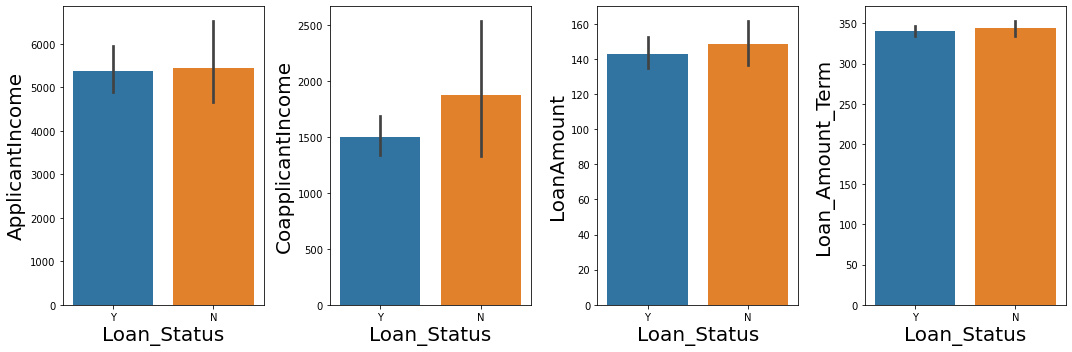

In [250]:
plt.figure(figsize=(15,5),facecolor='white')
plotnum=1
y=df['Loan_Status']
for i in df[['ApplicantIncome','CoapplicantIncome','LoanAmount', 'Loan_Amount_Term']]:
    if plotnum<=4:
        plt.subplot(1,4,plotnum)
        sns.barplot(y,df[i])
        plt.xlabel('Loan_Status',fontsize=20)
        plt.ylabel(i,fontsize=20)
    plotnum+=1
plt.tight_layout()

from above graph we observe as follows:

Applicant income not seem to contribute much to loan approval.

Loan rejection high for higher Coapplicant Income.

LoanAmount does not seem to have a strong correlation with Loan Status.

## Multivarant Analysis

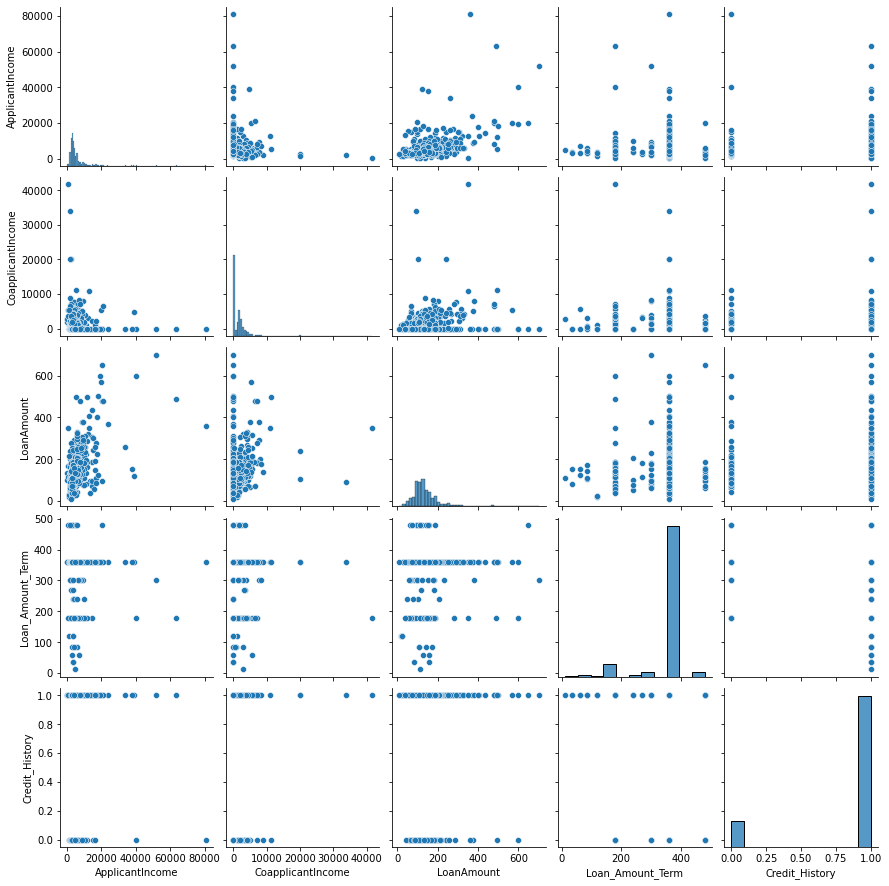

In [251]:
sns.pairplot(df)

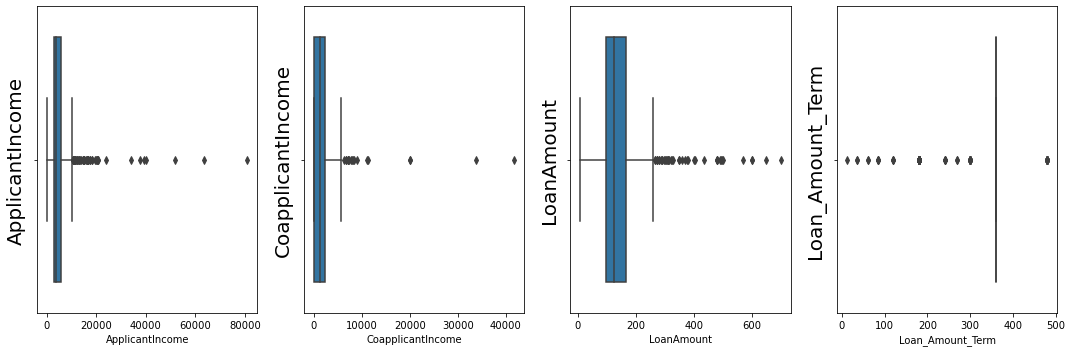

In [252]:
plt.figure(figsize=(15,5),facecolor='white')
plotnum=1
for i in df[['ApplicantIncome','CoapplicantIncome','LoanAmount', 'Loan_Amount_Term']]:
    if plotnum<=4:
        plt.subplot(1,4,plotnum)
        sns.boxplot(df[i])
        plt.ylabel(i,fontsize=20)
    plotnum+=1
plt.tight_layout()

In [253]:
feature=df[["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"]]

In [254]:
z=np.abs(zscore(feature))
df_new=df[(z<3).all(axis=1)]
df_new.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,97.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [255]:
df=df_new.copy()

In [256]:
df.shape

(577, 12)

In [257]:
loss=(612-577)/612*100
loss

5.718954248366013

data loss is 5.71% which is less than 10 and can be affordable so we go ahead to build a model

## Label Encoding

In [258]:
le=LabelEncoder()
df['Loan_Status']=le.fit_transform(df['Loan_Status'])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,97.0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


## Ordinal Encoder

In [259]:
oe=OrdinalEncoder()
df['Gender']=oe.fit_transform(df['Gender'].values.reshape(-1,1))
df['Married']=oe.fit_transform(df['Married'].values.reshape(-1,1))
df['Education']=oe.fit_transform(df['Education'].values.reshape(-1,1))
df['Self_Employed']=oe.fit_transform(df['Self_Employed'].values.reshape(-1,1))
df['Property_Area']=oe.fit_transform(df['Property_Area'].values.reshape(-1,1))
df['Dependents']=oe.fit_transform(df['Dependents'].values.reshape(-1,1))

In [260]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,97.0,360.0,1.0,2.0,1
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0.0,0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,2.0,1
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,2.0,1
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,2.0,1


In [263]:
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.167275
Loan_Amount_Term    -2.059849
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

## splitting the tartget and independent varibales in x and y 

In [282]:
x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [283]:
from sklearn.preprocessing import PowerTransformer

In [284]:
for col in df:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])


In [285]:
df.skew()


Gender              -1.622920
Married             -0.630211
Dependents           0.579572
Education            1.306588
Self_Employed        2.252848
ApplicantIncome     -0.204913
CoapplicantIncome   -0.216757
LoanAmount          -0.597820
Loan_Amount_Term    -2.059849
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [288]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.378997,0.186913,0.045696,-0.006207,0.060302,0.235133,0.176124,-0.108327,0.013172,-0.026340,0.017408
Married,0.378997,1.000000,0.348649,0.024817,-0.015779,-0.026283,0.339399,0.184809,-0.132644,0.019308,0.010595,0.089026
Dependents,0.186913,0.348649,1.000000,0.062941,0.063269,0.108642,0.022810,0.132006,-0.092064,-0.017113,0.030931,0.019071
Education,0.045696,0.024817,0.062941,1.000000,-0.007139,-0.174609,0.054682,-0.111115,-0.085786,-0.075217,-0.068596,-0.092658
Self_Employed,-0.006207,-0.015779,0.063269,-0.007139,1.000000,0.207418,-0.089466,0.110901,-0.029724,-0.016390,-0.028253,-0.026525
ApplicantIncome,0.060302,-0.026283,0.108642,-0.174609,0.207418,1.000000,-0.362495,0.395979,-0.064349,0.027449,-0.010603,-0.001761
CoapplicantIncome,0.235133,0.339399,0.022810,0.054682,-0.089466,-0.362495,1.000000,0.204822,-0.002969,0.008071,-0.072402,0.081455
LoanAmount,0.176124,0.184809,0.132006,-0.111115,0.110901,0.395979,0.204822,1.000000,0.047013,-0.008491,-0.107829,-0.014043
Loan_Amount_Term,-0.108327,-0.132644,-0.092064,-0.085786,-0.029724,-0.064349,-0.002969,0.047013,1.000000,0.029535,-0.058964,-0.021241
Credit_History,0.013172,0.019308,-0.017113,-0.075217,-0.016390,0.027449,0.008071,-0.008491,0.029535,1.000000,-0.008121,0.560936


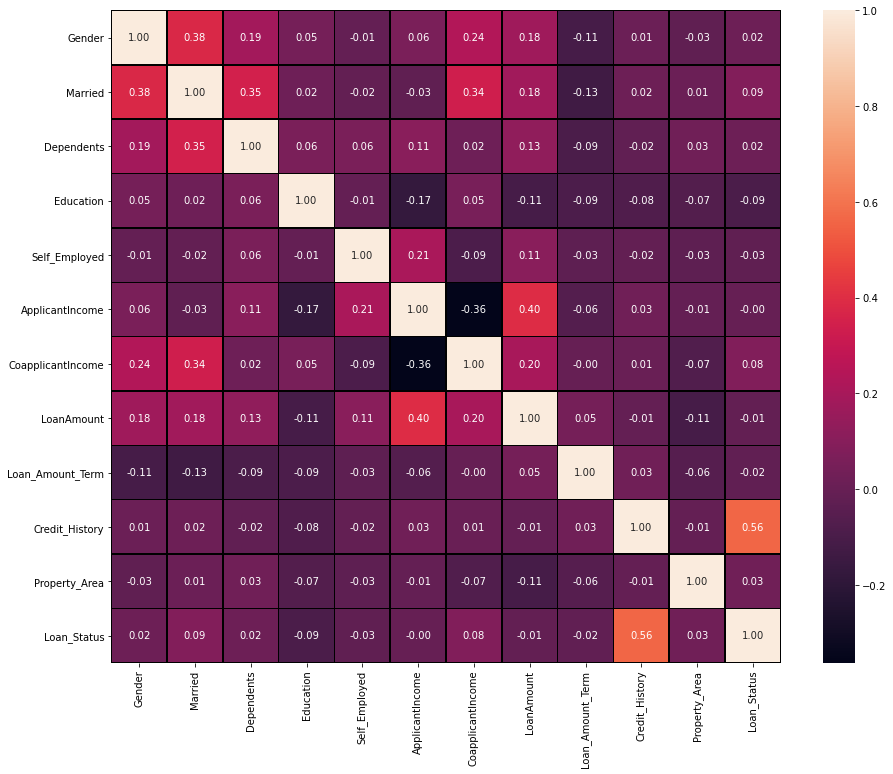

In [291]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True, linecolor='black',linewidth='0.5', fmt='.2f')
plt.show()

## Feature Scaling

In [305]:
x = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

In [306]:
x.shape

(577, 11)

In [307]:
y.shape

(577,)

In [310]:
sc= StandardScaler()
x = scaler.fit_transform(x)
x

array([[ 0.47713685, -1.36251079, -0.79482215, ...,  0.23781291,
         0.41851254,  1.22747207],
       [ 0.47713685,  0.73393914,  0.7369308 , ...,  0.23781291,
         0.41851254, -1.30652215],
       [ 0.47713685,  0.73393914, -0.79482215, ...,  0.23781291,
         0.41851254,  1.22747207],
       ...,
       [ 0.47713685,  0.73393914,  0.7369308 , ...,  0.23781291,
         0.41851254,  1.22747207],
       [ 0.47713685,  0.73393914,  1.36141754, ...,  0.23781291,
         0.41851254,  1.22747207],
       [-2.09583477, -1.36251079, -0.79482215, ...,  0.23781291,
        -2.38941464, -0.03952504]])

In [318]:
y.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

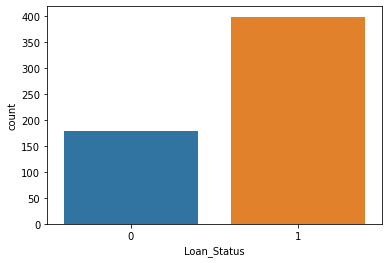

In [319]:
g = sns.countplot(df['Loan_Status'])
g.set_xticklabels(['0','1'])
plt.show()

In [358]:
import os
import sys
!pip install -U scikit-learn


  Using cached scikit_learn-1.0.2-cp38-cp38-win_amd64.whl (7.2 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\scikit_learn-0.24.1.dist-info\\COPYING'
Consider using the `--user` option or check the permissions.



In [394]:
# class count
Loan_Status_count_0, Loan_Status_count_1 = df['Loan_Status'].value_counts()

In [395]:

# Separate class
Loan_Status_0 = df[df['Loan_Status'] == 0]
Loan_Status_1 = df[df['Loan_Status'] == 1]# print the shape of the class
print('Loan_Status 0:',Loan_Status_0.shape)
print('Loan_Status 1:',Loan_Status_1.shape)

Loan_Status 0: (179, 12)
Loan_Status 1: (398, 12)


total Loan_Status of 1 and 0: 0    179
1    179
Name: Loan_Status, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

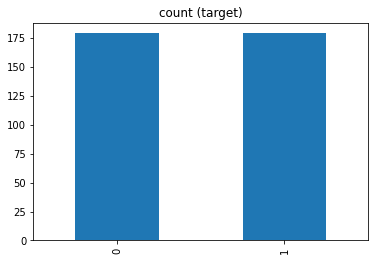

In [400]:
Loan_Status_1_over = Loan_Status_1.sample(Loan_Status_count_1, replace=True)

test_over = pd.concat([Loan_Status_1_over, Loan_Status_0], axis=0)

print("total Loan_Status of 1 and 0:",test_over['Loan_Status'].value_counts())# plot the count after under-sampeling
test_over['Loan_Status'].value_counts().plot(kind='bar', title='count (target)')

In [388]:
max_acc=0
max_RS=0

for i in range(1,500):
    x_train, x_test, y_train,y_test = train_test_split(x,y, test_size=0.25, random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc_score = (accuracy_score(y_test, pred))*100
    
    if acc_score>max_acc:
        max_acc=acc_score
        max_RS=i

print("Best accuracy score is", max_acc,"on Random State", max_RS) 

Best accuracy score is 91.0344827586207 on Random State 494


## Machine Learning Model for Classification with Evaluation Metrics

In [389]:
# Classification Model Function

def classify(model,x,y):
    x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=494)
    
    # Training the model
    model.fit(x_train,y_train)
    
    # Predicting Y_test
    pred = model.predict(x_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model,x,y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

In [390]:
# Logistic Regression

model=LogisticRegression()
classify(model,x,y)

Accuracy Score: 91.0344827586207

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.59      0.75        32
           1       0.90      1.00      0.95       113

    accuracy                           0.91       145
   macro avg       0.95      0.80      0.85       145
weighted avg       0.92      0.91      0.90       145

Cross Validation Score: 81.80809595202398

Accuracy Score - Cross Validation Score is 9.226386806596722


In [391]:
model=SVC()
classify(model,x,y)

Accuracy Score: 91.72413793103448

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.62      0.77        32
           1       0.90      1.00      0.95       113

    accuracy                           0.92       145
   macro avg       0.95      0.81      0.86       145
weighted avg       0.93      0.92      0.91       145

Cross Validation Score: 81.80809595202398

Accuracy Score - Cross Validation Score is 9.916041979010501


In [413]:
# Random Forest Classifier

model=RandomForestClassifier()
classify(model,x,y)

Accuracy Score: 92.41379310344827

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.69      0.80        32
           1       0.92      0.99      0.95       113

    accuracy                           0.92       145
   macro avg       0.94      0.84      0.88       145
weighted avg       0.93      0.92      0.92       145

Cross Validation Score: 80.42428785607197

Accuracy Score - Cross Validation Score is 11.9895052473763


In [340]:
# K Neighbors Classifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model,x,y)

Accuracy Score: 88.27586206896552

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.47      0.64        32
           1       0.87      1.00      0.93       113

    accuracy                           0.88       145
   macro avg       0.93      0.73      0.78       145
weighted avg       0.90      0.88      0.87       145

Cross Validation Score: 80.93853073463268

Accuracy Score - Cross Validation Score is 7.337331334332845


In [345]:
model=DecisionTreeClassifier()
classify(model,x,y)

Accuracy Score: 80.0

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.69      0.60        32
           1       0.90      0.83      0.87       113

    accuracy                           0.80       145
   macro avg       0.72      0.76      0.73       145
weighted avg       0.82      0.80      0.81       145

Cross Validation Score: 70.53973013493253

Accuracy Score - Cross Validation Score is 9.460269865067474


In [346]:
# XGB Classifier

model=xgb.XGBClassifier(verbosity=0)
classify(model,x,y)

Accuracy Score: 84.13793103448276

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.69      0.66        32
           1       0.91      0.88      0.90       113

    accuracy                           0.84       145
   macro avg       0.77      0.79      0.78       145
weighted avg       0.85      0.84      0.84       145

Cross Validation Score: 77.13043478260869

Accuracy Score - Cross Validation Score is 7.007496251874073


In [414]:
parameter = {'criterion':['gini','entropy'],
             'max_depth': [10,15,20,25],
             'n_estimators':[100,200,300,400],
             'max_features': ["auto","sqrt","log2"]}

In [415]:
gcv=GridSearchCV(RandomForestClassifier(),parameter,cv=5)
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400]})

In [430]:
gcv.best_params_

{'criterion': 'gini',
 'max_depth': 25,
 'max_features': 'log2',
 'n_estimators': 100}

In [431]:
final_model=RandomForestClassifier(criterion="gini", max_depth=25 , max_features="log2" ,n_estimators=100)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
acc=accuracy_score(y_test,pred)

print(acc*100)

78.62068965517241
